# Цель

Целью данного проекта является разработка и обучение нейросетевой модели для классификации качества красного вина на основе химических и вкусовых характеристик.

В этом отчете подробно рассматриваются этапы предобработки данных, балансировки классов, построения и обучения модели, а также анализируются полученные результаты.

# Загрузка и подготовка данных

In [422]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Исходный набор данных состоит из 1599 образцов красного вина с 11 входными признаками и целевой переменной quality, принимающей значения от 3 до 8.

In [423]:
df = pd.read_csv("winequality-red.csv")
df = df.dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [416]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Наблюдается дисбаланс в переменной quality (качество вина), поскольку среднее значение составляет около 5.6, а медиана — 6, что может указывать на смещение в сторону определенных классов.

Есть существенная разница в разбросе значений по некоторым параметрам, например, total sulfur dioxide имеет максимум 289, что значительно превышает медианное значение 38.

Встречаются выбросы (например, residual sugar достигает 15.5 при среднем значении 2.54), что может потребовать нормализации данных перед обучением модели.

После проведения анализа было решено использовать метод SMOTE для балансировки классов, чтобы улучшить производительность модели при предсказании различных категорий качества вина.

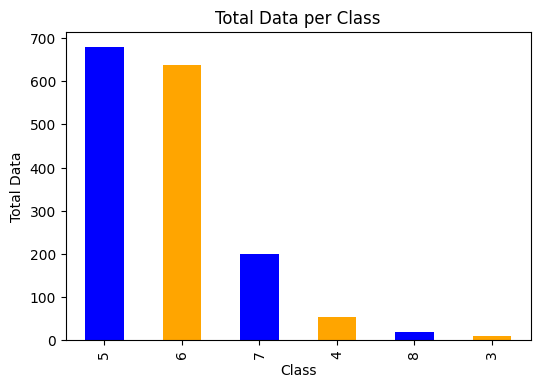

In [417]:
# Menghitung jumlah data untuk setiap kelas
class_counts = df['quality'].value_counts()

# Menampilkan bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Total Data')
plt.title('Total Data per Class')
plt.show()

## Балансировка данных с помощью SMOTE

Важно учитывать, что датасет содержит дисбалансированные классы, что может повлиять на качество классификации.

Для устранения этой проблемы используется метод SMOTE (Synthetic Minority Over-sampling Technique), который генерирует новые образцы для менее представленных классов, увеличивая их количество.

Данные охраняются в новый CSV-файл "winequality-red-augmented.csv" для последующего использования.

In [418]:
# Загрузка данных
X = df.drop("quality", axis="columns")
y = df["quality"]

In [244]:
# Применение SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Объединение данных обратно в DataFrame с последующим сохранением
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["quality"] = y_resampled
df_resampled.to_csv("winequality-red-augmented.csv", index=False)

In [427]:
df = pd.read_csv("winequality-red-augmented.csv")
df.head()  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [426]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,8.371096,0.586186,0.274621,2.596496,0.089133,13.275619,36.462971,0.996547,3.325002,0.656203,10.713662,5.500000
std,1.631292,0.250700,0.203624,1.187810,0.044553,9.680212,28.502491,0.001862,0.152269,0.158804,1.164575,1.708034
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.387335,0.074964,1.961736,0.070000,5.844967,15.692732,0.995380,3.219658,0.545519,9.796714,4.000000
50%,8.010694,0.541581,0.270000,2.205759,0.078759,10.289999,27.000000,0.996551,3.319817,0.630000,10.600000,5.500000
75%,9.400000,0.723170,0.445292,2.759500,0.092000,17.076228,47.821179,0.997689,3.420000,0.742321,11.485069,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


После применения метода SMOTE количество данных увеличилось с 1599 до 4086 записей.

Средние значения большинства признаков изменились незначительно, что подтверждает сохранение структуры данных после применения SMOTE.

Стандартное отклонение увеличилось у большинства признаков, особенно у volatile acidity, citric acid и alcohol. Это свидетельствует о том, что добавленные синтетические данные расширили диапазон значений этих признаков.

Количество объектов в каждом классе теперь сбалансировано, так как quality принимает равномерное распределение по всем возможным категориям (от 3 до 8).

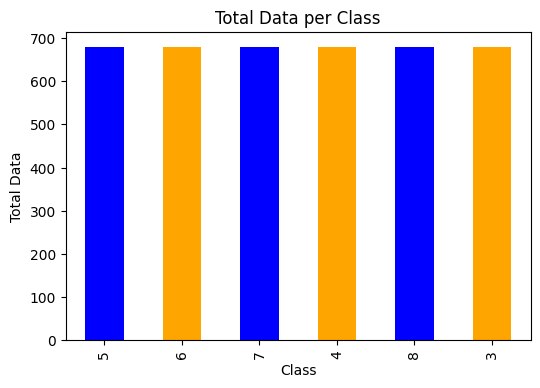

In [390]:
# Menghitung jumlah data untuk setiap kelas
class_counts = df['quality'].value_counts()

# Menampilkan bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Total Data')
plt.title('Total Data per Class')
plt.show()

Применение SMOTE позволило улучшить балансировку классов.

Общая структура данных осталась неизменной, однако, увеличение стандартного отклонения говорит о некотором расширении вариативности данных.

Ожидается, что после балансировки классов модель будет обучаться более равномерно и лучше предсказывать менее представленные ранее классы качества вина.

# Разделение данных и стандартизация

In [391]:
# Загрузка данных
X = df.drop("quality", axis="columns").values
y = df["quality"].values

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

Разделение производится с фиксированным `random_state`, чтобы обеспечить воспроизводимость результатов.

In [ ]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Поскольку входные признаки имеют различные масштабы, их необходимо нормализовать, чтобы улучшить сходимость модели.

Используется `StandardScaler`, который преобразует данные таким образом, что они имеют нулевое среднее и единичное стандартное отклонение.

Масштабирование сначала применяется к обучающему набору данных, а затем тот же скейлер используется для тестового набора, чтобы избежать утечки информации.

In [ ]:
# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Подготовка данных для PyTorch

## Преобразование в тензоры

Метки классов `y_train` и `y_test` смещаются на -3 для приведения диапазона значений к индексу классов, что упрощает обучение модели.

In [ ]:
# Преобразование в тензоры
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train - 3, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test - 3, dtype=torch.long).to(device)

## Определение гиперпараметров

In [ ]:
# Гиперпараметры
input_size = X_train.shape[1]    # Размер входного слоя
hidden_size1 = 160               # Размер 1-го скрытого слоя
hidden_size2 = 144               # Размер 2-го скрытого слоя
output_size = len(set(y_train))  # Размер выходного слоя
batch_size = 2048                # Размер батча
learning_rate = 0.011576         # Скорость обучения
epochs = 300                     # Количество эпох
dropout_rate = 0.1               # Коэффициент дропаута
weight_decay = 1.0379e-06        #Коэффициент L2-регуляризации

# Построение и обучение НС

## Определение архитектуры модели

In [ ]:
# DataLoader
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Создается нейросетевая модель `NeuralNet`, состоящая из трех полносвязных (`Linear`) слоев.

В качестве функции активации используется ReLU, который помогает модели лучше улавливать нелинейные зависимости.

После каждого скрытого слоя применяется Dropout, что снижает вероятность переобучения.

In [ ]:
# Определение модели
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

На рисунке ниже представлена архитектура НС

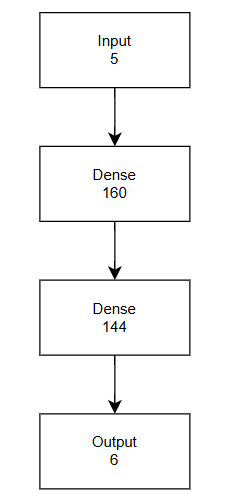

## Оптимизация и функция потерь

Используется `Adam`, который является адаптивным оптимизатором, позволяющим модели быстрее обучаться.

Выбрана функция потерь `CrossEntropyLoss()` т.к. она применяется к многоклассовой задаче классификации.

In [411]:
# Инициализация модели
model = NeuralNet(input_size, hidden_size1, hidden_size2, output_size, dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

## Обучение модели

Epoch 0, Accuracy: 0.47
Epoch 50, Accuracy: 0.84
Epoch 100, Accuracy: 0.85
Epoch 150, Accuracy: 0.86
Epoch 200, Accuracy: 0.87
Epoch 250, Accuracy: 0.87
Test Accuracy: 0.87


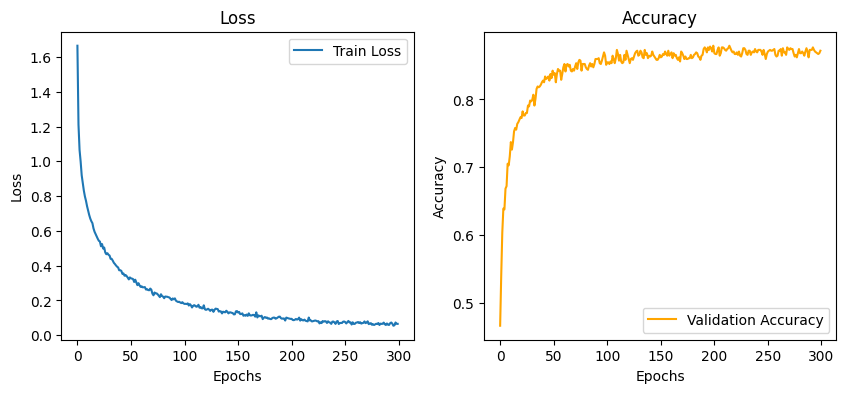

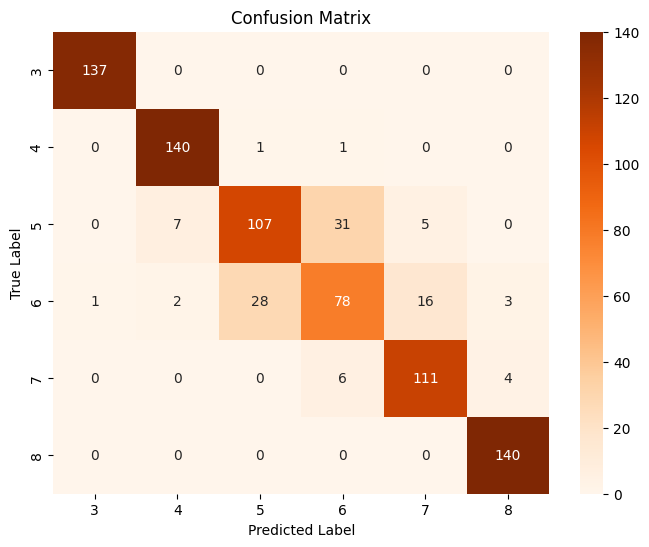

In [ ]:
# Обучение
train_losses = []
test_accuracies = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(dataloader))

    # Тестирование
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        y_pred = torch.argmax(test_outputs, axis=1)
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
        test_accuracies.append(test_accuracy)
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Accuracy: {test_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Графики потерь и точности
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

# Матрица ошибок
cm = confusion_matrix(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
labels = [3, 4, 5, 6, 7, 8]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges' , xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Результаты и анализ модели

Потери на обучающем наборе данных уменьшаются с увеличением количества эпох, что указывает на успешное обучение модели.

Точность классификации увеличивается по мере тренировки, достигая стабильных значений.

Классы 3, 4 и 8 классифицируются практически без ошибок:
- Все 137 образцов класса 3 предсказаны правильно.
- 140 из 142 образцов класса 4 также предсказаны верно, а 2 ошибки допущены при классификации в классы 5 и 6.
- Класс 8 классифицирован безошибочно (140 из 140).

Наибольшая путаница наблюдается между классами 5 и 6:
- 31 образец класса 5 был ошибочно классифицирован как 6, что может указывать на схожесть их признаков.
 - 28 образцов класса 6 предсказаны как 5, а еще 16 — как 7, что также подтверждает сложность их разделения.

Класс 7 имеет 6 ошибок предсказания в класс 6 и 4 ошибки в класс 8.

Итоговая точность на тестовом наборе данных составила **87%**, что является хорошим результатом для данной задачи.

# Заключение

Разработанная нейросетевая модель продемонстрировала высокую точность классификации качества вина 87%.

Классы 3, 4 и 8 наиболее устойчивы к ошибкам классификации, что может говорить о четких различиях их характеристик.

Классы 5, 6 и 7 часто путаются между собой, что может указывать на необходимость дополнительного улучшения модели

Проект демонстрирует успешное применение методов глубокого обучения для задачи классификации качества вина, а также важность предобработки данных и балансировки классов для достижения высокой точности.